<h1> OPEN AI


In [2]:
# Options for open AI models

#Temperature
#This option sets the sampling temperature.
#Values can be chosen between 0 and 2. Higher values (e.g., 0.8) make the output more random, while lower values (e.g., 0.2) 
#make it more focused and deterministic.

#Max Tokens
#Specifies the maximum number of tokens to generate in the completion. 

#Model Name
'''
gpt-4o
A latest multimodal flagship model that is cheaper and faster than GPT-4 Turbo.
Context Length: 128,000 tokens
Max Tokens per Generation: 4,096 tokens

gpt-4-turbo
The latest GPT-4 Turbo model with vision capabilities, JSON mode, and function calling support.
Context Length: 128,000 tokens
Max Tokens per Generation: 4,096 tokens

gpt-4o-mini
A smaller model with better performance than GPT-3.5 Turbo.
Context Length: 128,000 tokens
Max Tokens per Generation: 16,384 tokens
'''

In [ ]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 객체를 생성합니다.
gpt = ChatOpenAI(
    temperature=0,
    model_name="gpt-4o",  # 모델명
)

<h1> Anthropic





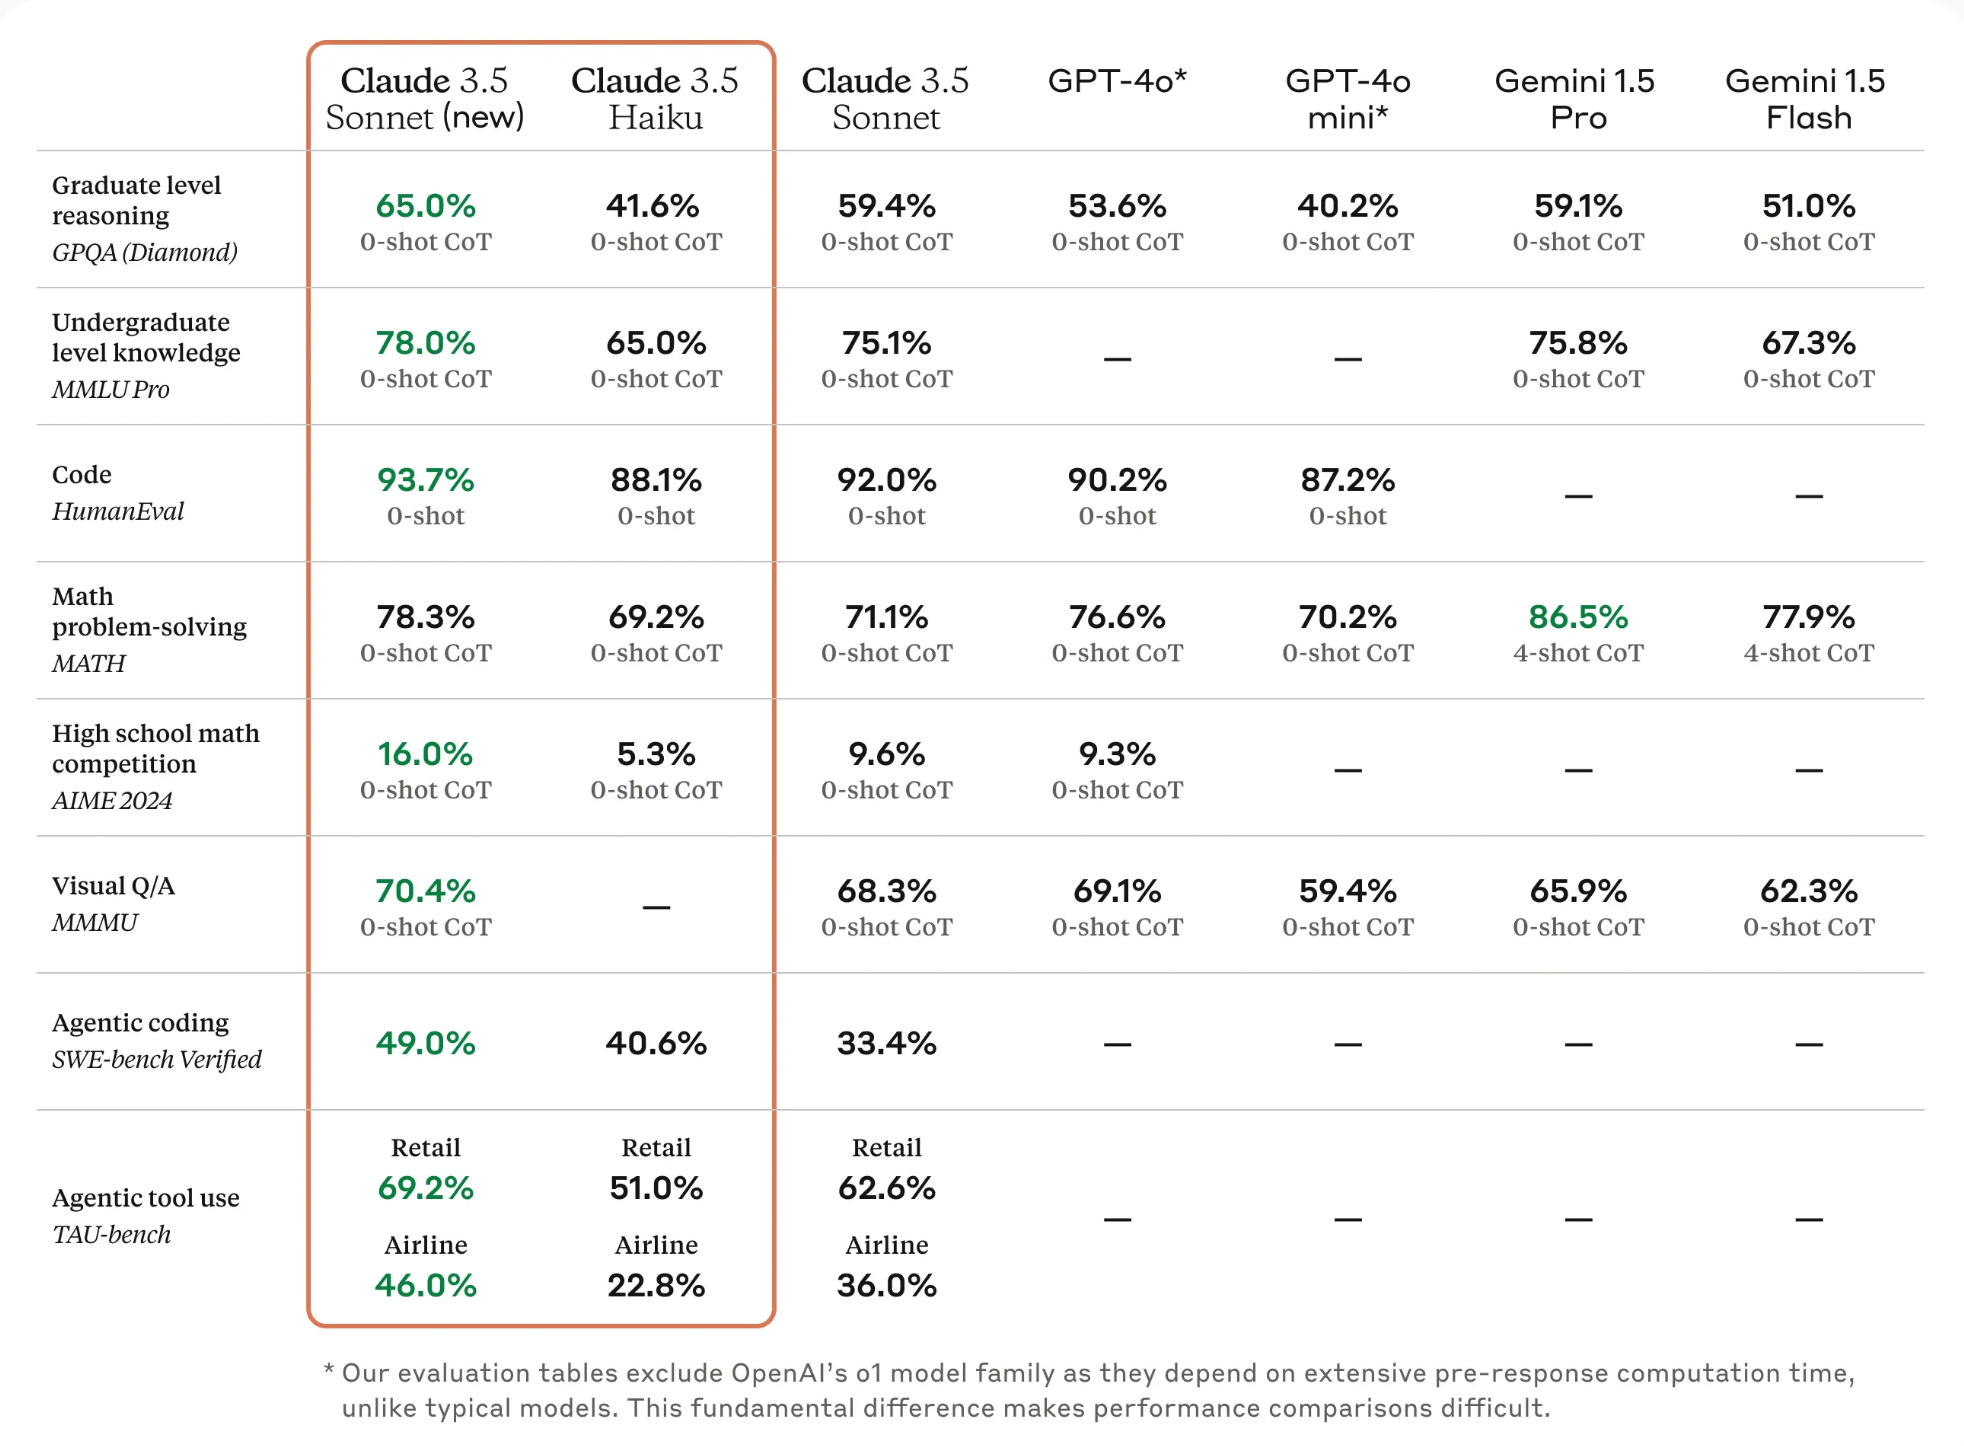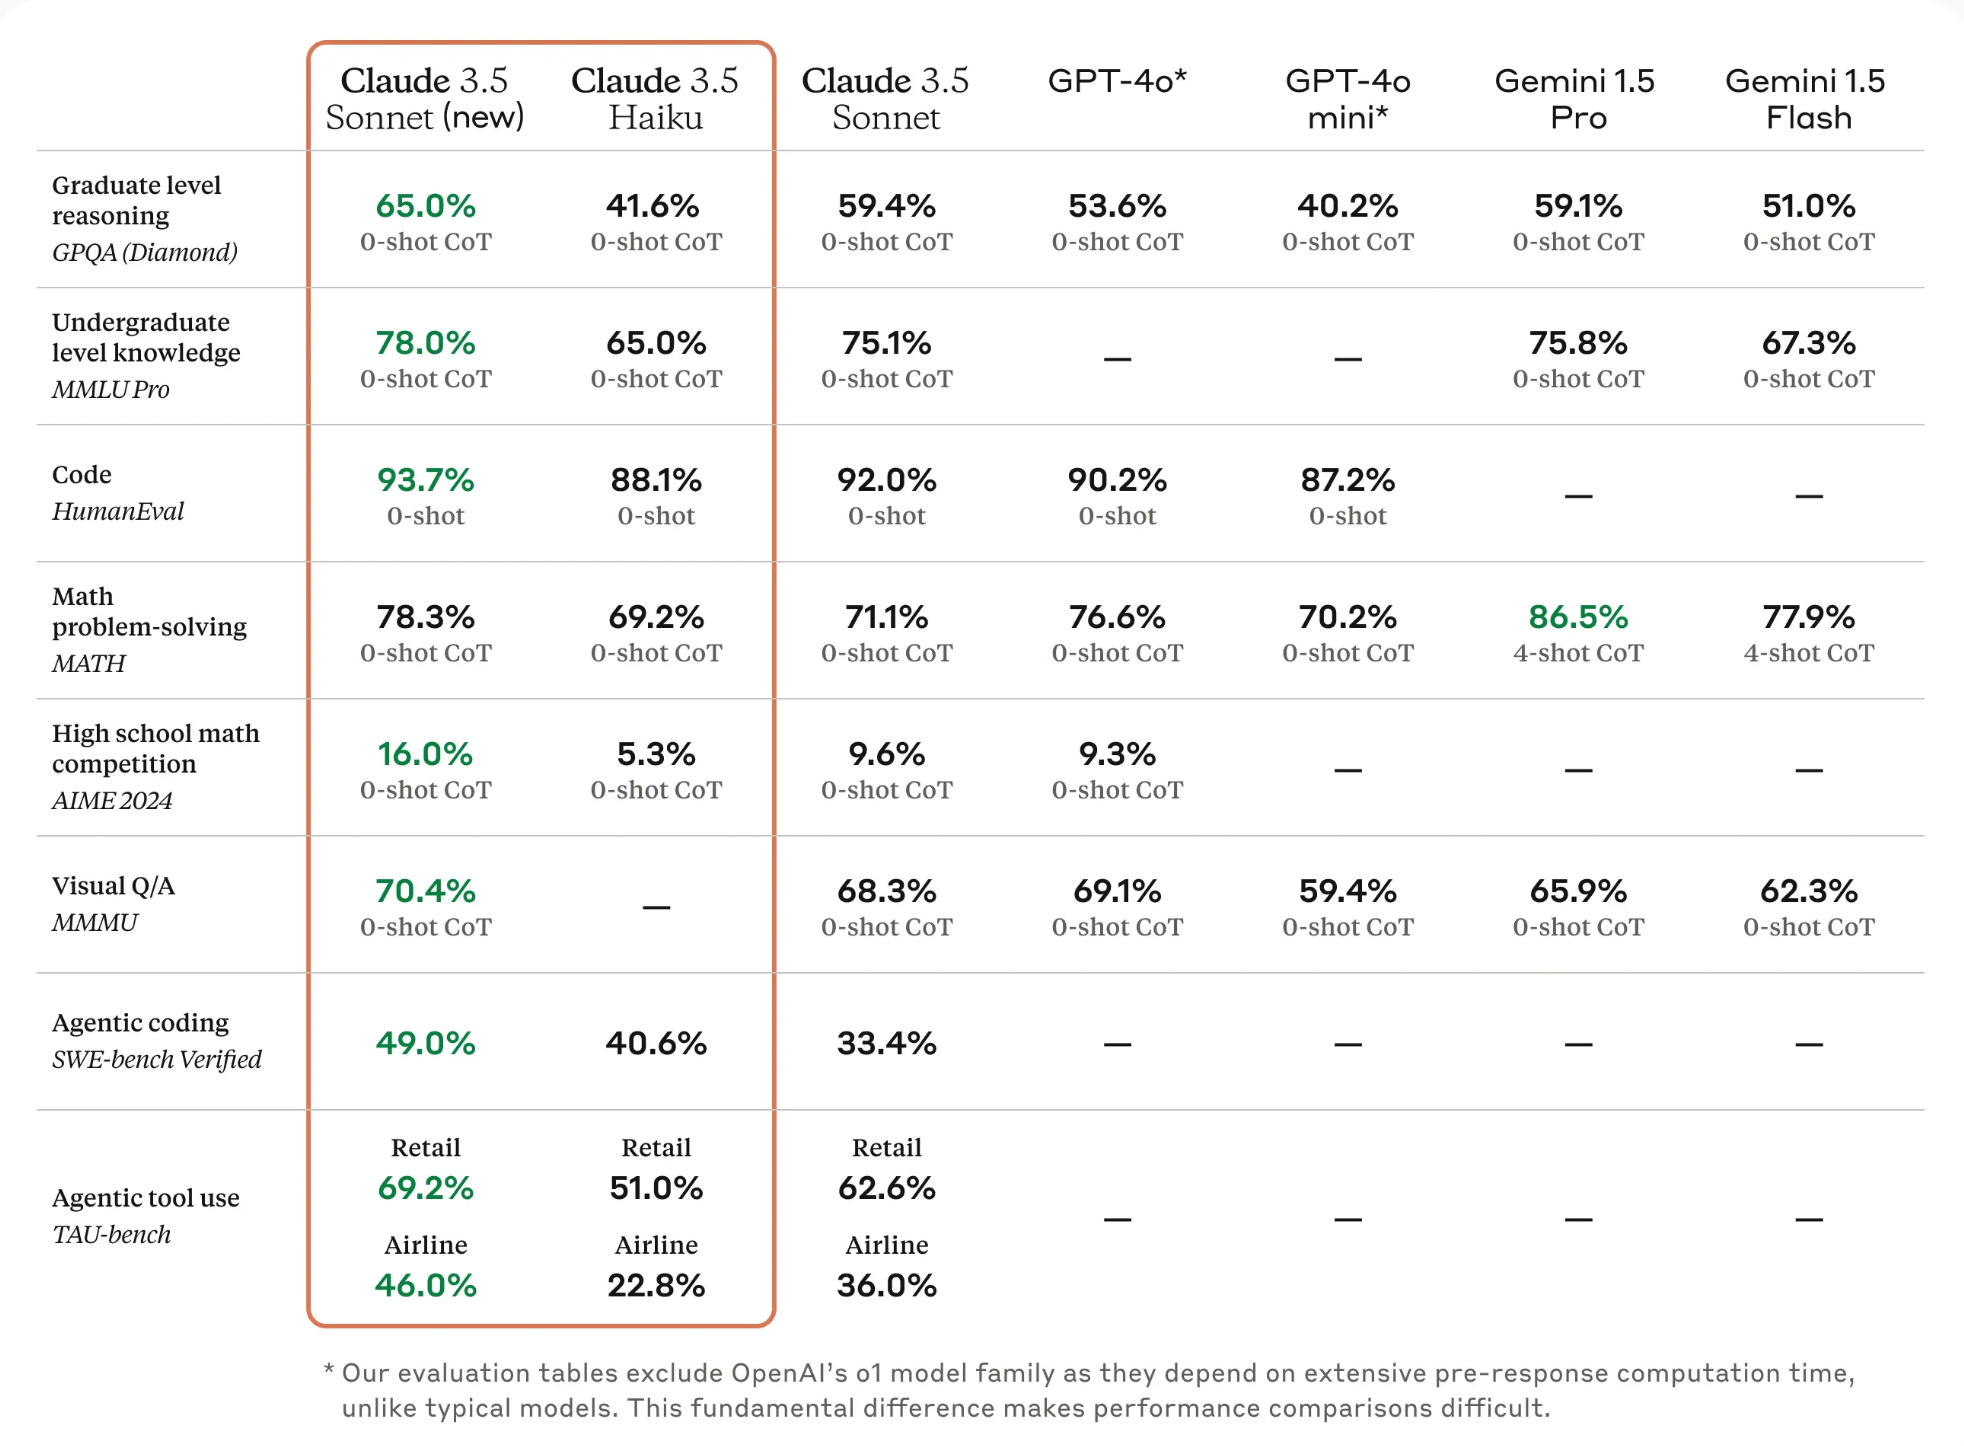

In [ ]:
# API 키 발급: https://console.anthropic.com/settings/keys
# 모델 리스트: https://docs.anthropic.com/en/docs/about-claude/models

In [10]:
from langchain_anthropic import ChatAnthropic

# ChatAnthropic 객체 생성
anthropic = ChatAnthropic(model_name="claude-3-5-sonnet-20241022")

<h1> Hugging Face Local Pipelines

In [ ]:
# 설치
# !pip install -qU transformers
# import os
# from langchain_huggingface import HuggingFacePipeline
# from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [ ]:
# Setting the path to download Hugging Face models/tokenizers

os.environ["HF_HOME"] = "./cache/"

In [ ]:
# Use HuggingFacePipeline class to load a pre-trained model 
# Use 'from_model_id' method to specify the "beomi/llama-2-ko-7b model" and set the task to "text-generation".
# With the pipeline_kwargs parameter, limit the maximum number of tokens generated to 10.


model_id = "microsoft/Phi-3-mini-4k-instruct"

# load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load model
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    # load_in_4bit=True, # bitsandbytes 설치되어 있는 경우(linux)
    # attn_implementation="flash_attention_2", # ampere GPU 가 있는 경우
)
# Create pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=512)

hf = HuggingFacePipeline(pipeline=pipe)


In [ ]:
from langchain_huggingface import ChatHuggingFace

llm = ChatHuggingFace(llm=hf)

template = """<|system|>You are a helpful assistant.<|end|>
<|user|>{question}<|end|>
<|assistant|>"""  

prompt = PromptTemplate.from_template(template)  

# 프롬프트와 언어 모델을 연결하여 체인 생성
chain = prompt | llm | StrOutputParser()

question = "미국 연준의장은 누구야?" 

answer = chain.stream({"question": question})

<h1> Prompt

In [ ]:
prompt = PromptTemplate.from_template(
    """
You are a helpful assistant. Please answer the following questions.

QUESTION:
{question}

EMAIL CONVERSATION:
{email_conversation}

FORMAT:
{format}
"""
)

# format 에 PydanticOutputParser의 부분 포맷팅(partial) 추가
prompt = prompt.partial(format=parser.get_format_instructions())

<h1> Serialization

In [ ]:
# Note: Serialization in this context only saves the configuration parameters (like the model type, temperature, etc.),
# not the actual model weights or logic. 

from dotenv import load_dotenv

load_dotenv():


In [ ]:
import os
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

# Define a template where {country} serves as a placeholder. 
prompt = PromptTemplate.from_template("{country}의 10년물 국채 금리는 얼마입니까?")

In [ ]:
# Print whether the ChatOpenAI class is serializable
print(f"ChatOpenAI: {ChatOpenAI.is_lc_serializable()}")

# Create an instance of the ChatOpenAI class
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Print whether the llm instance is serializable
print(f"ChatOpenAI: {llm.is_lc_serializable()}")

<h1> Chain Serialization & Pickle

In [ ]:
#dumpd: Converts a LangChain object (e.g., chain) into a Python dictionary format.
#dumps: Serializes the object to a JSON string.


from langchain_core.load import dumpd, dumps

dumpd_chain = dumpd(chain)
dumpd_chain

dumps_chain = dumps(chain)
dumps_chain

In [ ]:

# Save as fruit_chain.pkl 
with open("interestrate_chain.pkl", "wb") as f:
    pickle.dump(dumpd_chain, f)

In [ ]:
# Load pickle
with open("interestrate_chain.pkl", "rb") as f:
    loaded_chain = pickle.load(f)

In [ ]:
# Load chain
chain_from_file = load(loaded_chain)

# Execute
print(chain_from_file.invoke({"country": "한국"}))